In [43]:
import librosa
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
DATASET_ODS = True

In [45]:
pd.read_excel('voces_test_rms.ods').sort_values(['zero_crossing_rate']).to_excel(r'features\features.xlsx', index=False)

In [46]:
if DATASET_ODS:
    dataset_features = pd.read_excel('voces_test_rms.ods').sort_values(['zero_crossing_rate'])

In [47]:
def extract_features(audio_path):
    """
    Extrae características de un archivo de audio.

    Args:
        audio_path (str): Ruta del archivo de audio.

    Returns:
        dict: Un diccionario que contiene las características extraídas:
            - 'zero_crossing_rate': Tasa de cruce por cero promedio.
            - 'rms': Valor RMS promedio.
            - 'mfcc': Coeficientes cepstrales de frecuencia promedio.
            - 'pitch': Valor de pitch promedio.
    """
    y, sr = librosa.load(audio_path, sr=None)
    zcr = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    rms_avg = np.mean(rms)
    rms_avg_np = np.array([rms_avg])
    rms_db = librosa.amplitude_to_db(rms_avg_np)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    f0, voiced_flag, voiced_probs = librosa.pyin(
            y,
            fmin=librosa.note_to_hz('C2'),
            fmax=librosa.note_to_hz('C7')
        )
    pitch = f0[voiced_flag > 0]

    features = {
        'zero_crossing_rate': np.mean(zcr),
        'rms': rms_db[0],
        'mfcc': np.mean(mfcc, axis=1),
        'pitch': pitch.mean()
    }

    return features, y, sr

In [48]:
if not DATASET_ODS:
    PATH = os.getcwd()
    AUDIO_FOLDER = 'voces'
    SUBFOLDERS = ['masculino', 'femenino']
    RMS_FOLDER = 'voces_rms'
    OUTPUT_FOLDER = 'features'
    FEATURES_FILE = 'features.xlsx'
    features_list = []

In [49]:
voice = [
    'hyacinthe-lovo-v3.wav',
    'lola-murf.wav',
    'neural2A-GCP.wav',
    'veronica-lovo-v4-pitchmodified.wav',
    'francisca-lovo-v2.wav'
]

In [50]:
if not DATASET_ODS:

    for subfolder in SUBFOLDERS:
        
        # if subfolder == 'masculino':
        #     continue
        
        
        audio_folder_path = os.path.join(PATH, AUDIO_FOLDER, subfolder, RMS_FOLDER)
        files = os.listdir(audio_folder_path)
        
        for file in files:
            
            if not file.endswith('.wav'): # or file != 'antoni-v2.wav'
                continue
            
            audio_file_path = os.path.join(audio_folder_path, file)
            features, y, sr = extract_features(audio_file_path)
            features = {key: [value] for key, value in features.items()}
            features.update({'genero': [subfolder]})
            features.update({'file': [file]})
            features_list.append(features)

In [51]:
if not DATASET_ODS:
    dataset_features = pd.DataFrame()

    for features in features_list:
        df_features = pd.DataFrame.from_dict(features, orient='columns')
        dataset_features = pd.concat([dataset_features, df_features], axis=0)


In [52]:
dataset_features.sort_values('zero_crossing_rate')

,zero_crossing_rate,rms,mfcc,pitch,genero,file
0,0.075944,-27.5,[-4.0729132e+02 1.3076346e+02 -3.0420111e+01 ...,111.111716,femenino,hyacinthe-lovo-v3.wav
1,0.093035,-27.0,[-424.61664 138.61742 -14.495688 3...,101.312090,femenino,lola-murf.wav
2,0.093043,-22.5,[-3.71418152e+02 1.31561859e+02 -1.60284328e+...,76.492752,masculino,neural2B-GCP.wav
3,0.098051,-22.0,[-3.4943588e+02 1.2940279e+02 -1.8956478e+01 ...,68.726911,masculino,alonso-naturalreader.wav
4,0.105458,-21.5,[-3.5115176e+02 1.1943483e+02 -1.9279911e+01 ...,69.045778,masculino,antonio-murf.wav
5,0.116978,-26.5,[-406.0902 126.13792 -21.46513 3...,117.898566,femenino,neural2A-GCP.wav
6,0.137449,-21.0,[-340.7002 132.91704 -31.981354 3...,71.771793,masculino,adam-evenlabs-pitchmodifield.wav
7,0.137822,-26.1,[-454.8679 72.41395 -14.8625145 45.9...,116.353345,femenino,francisca-lovo-v2.wav
8,0.142276,-20.5,[-3.6916684e+02 1.2000591e+02 -1.8859159e+01 ...,69.133215,masculino,lautaro-lovo-v3.wav
9,0.147760,-25.5,[-403.0913 113.70938 -25.405426 40.5...,100.992253,femenino,veronica-lovo-v4-pitchmodified.wav


In [53]:
dataset_features = dataset_features.rename(columns={
    'zero_crossing_rate': 'ZCR',
    'rms': 'RMS',
    'pitch': '$f_0$'
})

In [54]:
mask = dataset_features.genero == 'masculino'
dataset_features[mask].loc[:, ['ZCR', 'RMS', '$f_0$']].corr()

,ZCR,RMS,$f_0$
ZCR,1.000000,-0.814776,0.814360
RMS,-0.814776,1.000000,-0.895991
$f_0$,0.814360,-0.895991,1.000000


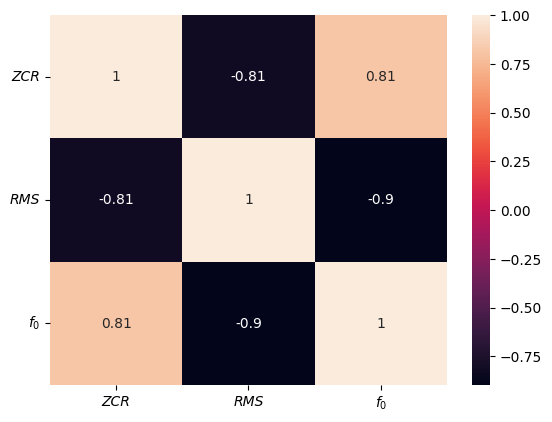

In [63]:
# Correlación Masculina

mask = dataset_features.genero == 'masculino'
ax = sns.heatmap(dataset_features[mask].loc[:, ['ZCR', 'RMS', '$f_0$']].corr(), annot=True)

# Cambiar los nombres de las variables a cursiva
ax.set_xticklabels(ax.get_xticklabels(), fontdict={'verticalalignment': 'top', 'rotation': 0, 'style': 'italic'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'verticalalignment': 'center', 'horizontalalignment': 'right', 'rotation': 0, 'style': 'italic'})

plt.show()

In [64]:
mask = dataset_features.genero == 'femenino'
dataset_features[mask].loc[:, ['ZCR', 'RMS', '$f_0$']].corr()

,ZCR,RMS,$f_0$
ZCR,1.000000,-0.749440,-0.163502
RMS,-0.749440,1.000000,0.107193
$f_0$,-0.163502,0.107193,1.000000


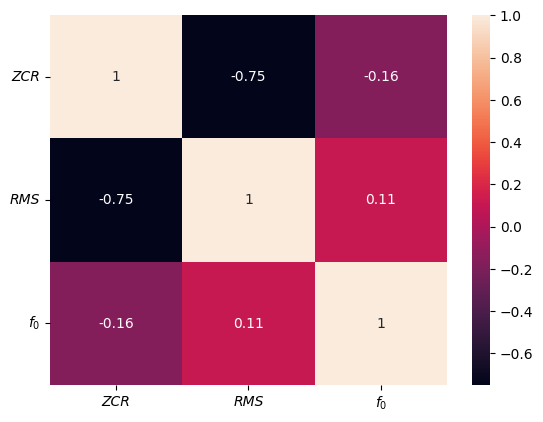

In [65]:
# Correlación Femenina

mask = dataset_features.genero == 'femenino'
ax = sns.heatmap(dataset_features[mask].loc[:, ['ZCR', 'RMS', '$f_0$']].corr(), annot=True)

# Cambiar los nombres de las variables a cursiva
ax.set_xticklabels(ax.get_xticklabels(), fontdict={'verticalalignment': 'top', 'rotation': 0, 'style': 'italic'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'verticalalignment': 'center', 'horizontalalignment': 'right', 'rotation': 0, 'style': 'italic'})

plt.show()

In [66]:
dataset_features.loc[:, ['ZCR', 'RMS', '$f_0$']].corr()

,ZCR,RMS,$f_0$
ZCR,1.000000,-0.335742,0.127512
RMS,-0.335742,1.000000,-0.851337
$f_0$,0.127512,-0.851337,1.000000


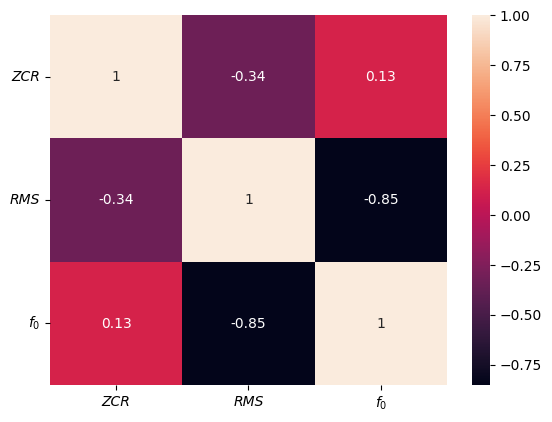

In [67]:
# Correlación Completa

ax = sns.heatmap(dataset_features.loc[:, ['ZCR', 'RMS', '$f_0$']].corr(), annot=True)

# Cambiar los nombres de las variables a cursiva
ax.set_xticklabels(ax.get_xticklabels(), fontdict={'verticalalignment': 'top', 'rotation': 0, 'style': 'italic'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'verticalalignment': 'center', 'horizontalalignment': 'right', 'rotation': 0, 'style': 'italic'})

plt.show()

In [68]:
dataset_features.sort_values('zero_crossing_rate').to_excel(
    'voces_test_rms.ods',
    index=False,
    engine='odf'
) #, engine='odf'

KeyError: 'zero_crossing_rate'

In [69]:
mask = dataset_features.genero == 'femenino'
dataset_features[mask].sort_values('zero_crossing_rate').to_excel(
    'voces_femenina_rms.ods',
    index=False,
    engine='odf'
) 

KeyError: 'zero_crossing_rate'

In [ ]:
mask = dataset_features.genero == 'masculino'
dataset_features[mask].sort_values('zero_crossing_rate').to_excel(
    'voces_masculina_rms.ods',
    index=False,
    engine='odf'
) 